<a href="https://colab.research.google.com/github/harkpun/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


## <b> Data Description </b>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b>Attribute Information: </b>

* Date - year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature - Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
 # Import necessary libraries

import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import tree

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/harkpun/Bike-Sharing-Demand-Prediction/main/Data/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
df = data.copy()

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

In [ ]:
df.describe(include='object')

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

In [ ]:
# pd.options.display.float_format = '{:,.2f} %'.format
# print((df.isnull().sum()/len(df))*100)
# pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# function to get information about data_type, null_count, unique_count in thr dataframe format

def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

data_type  null_count  unique_count
Date                         object           0           365
Rented Bike Count             int64           0          2166
Hour                          int64           0            24
Temperature(°C)             float64           0           546
Humidity(%)                   int64           0            90
Wind speed (m/s)            float64           0            65
Visibility (10m)              int64           0          1789
Dew point temperature(°C)   float64           0           556
Solar Radiation (MJ/m2)     float64           0           345
Rainfall(mm)                float64           0            61
Snowfall (cm)               float64           0            51
Seasons                      object           0             4
Holiday                      object           0             2
Functioning Day              object           0             2

In [ ]:
df.Date = pd.to_datetime(df.Date)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

df.drop('Date', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Day                        8760 non-null   int64

In [ ]:
# data conversion

def hour(x):
    ''' converting hours into session like mornig, Noon, Night etc.
        transforming data numeric to category. 
    '''
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make category
df['Session'] = df['Hour'].apply(hour)

In [ ]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

Functioning Day  Rented Bike Count
0             Yes            6172314
1              No                  0

In [ ]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

Seasons  Rented Bike Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

In [ ]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

Holiday  Rented Bike Count
0  No Holiday            5956419
1     Holiday             215895

In [ ]:
#sepreting numerical and categorical data

numeric_features = df.describe().columns
category_features = df.describe(include='object').columns

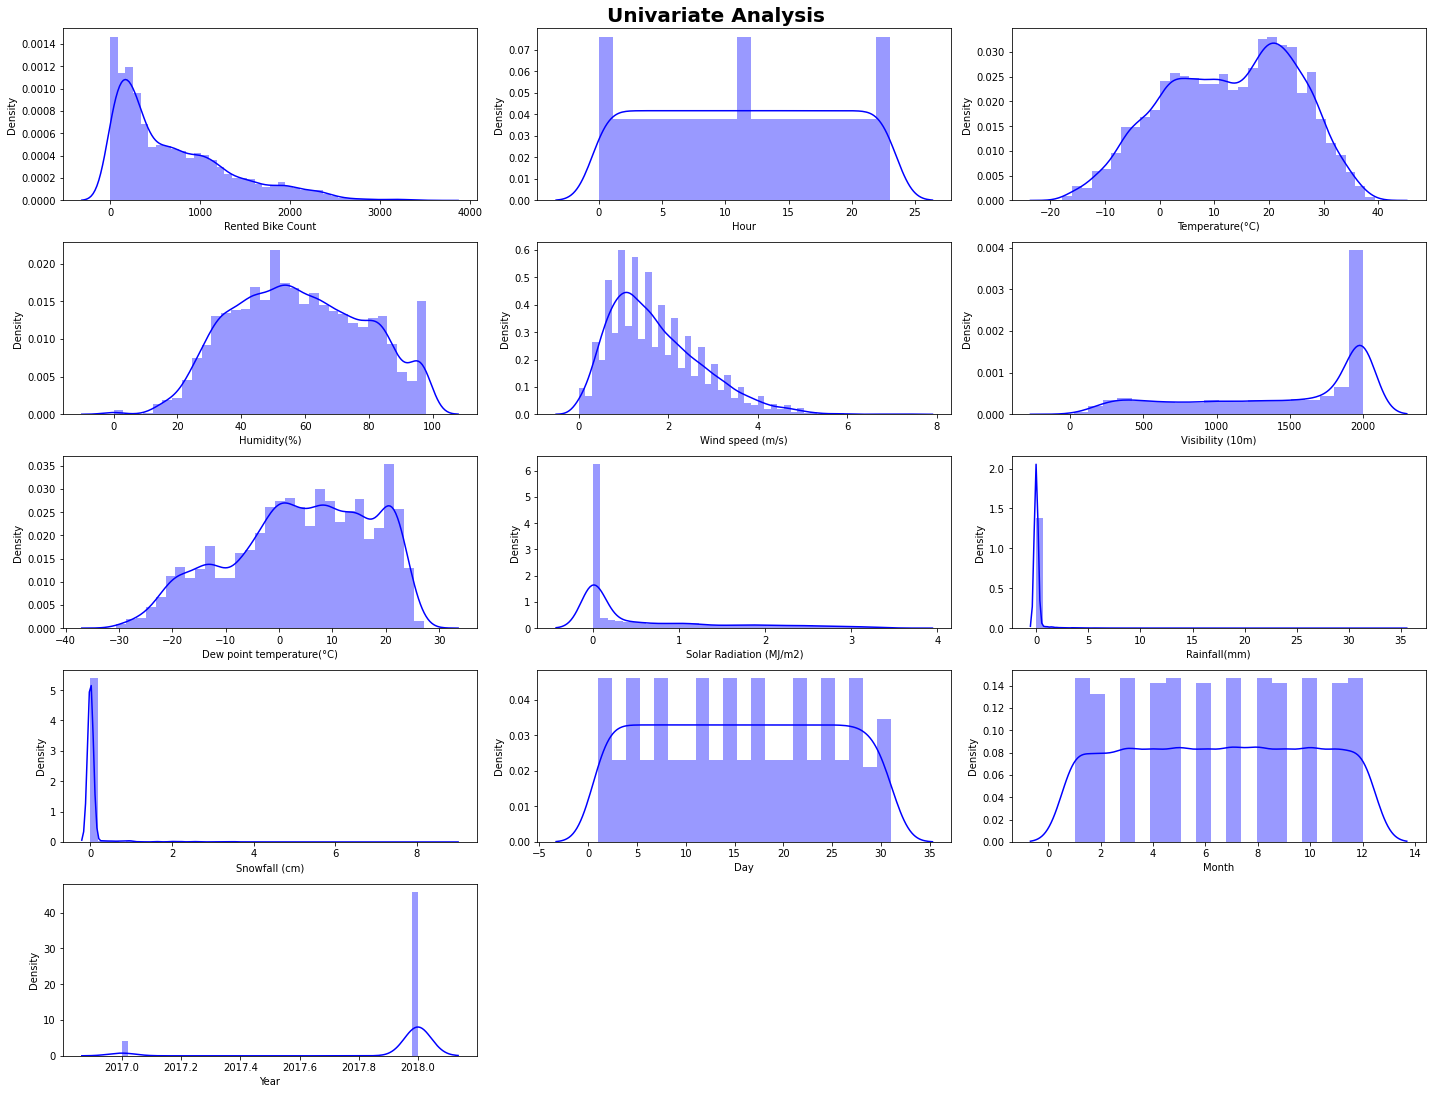

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[numeric_features[i]], kde=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
df.agg(['skew', 'kurtosis']).T

skew    kurtosis
Rented Bike Count           1.153428    0.853387
Hour                        0.000000   -1.204176
Temperature(°C)            -0.198326   -0.837786
Humidity(%)                 0.059579   -0.803559
Wind speed (m/s)            0.890955    0.727179
Visibility (10m)           -0.701786   -0.961980
Dew point temperature(°C)  -0.367298   -0.755430
Solar Radiation (MJ/m2)     1.504040    1.126433
Rainfall(mm)               14.533232  284.991099
Snowfall (cm)               8.440801   93.803324
Day                         0.007522   -1.193151
Month                      -0.010458   -1.207056
Year                       -2.978262    6.871614

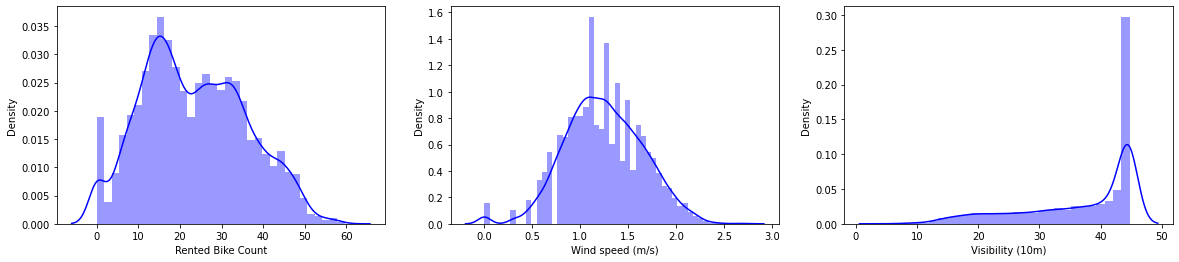

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,4))

sns.distplot(np.sqrt(df['Rented Bike Count']), kde=True, color='blue', ax=axs[0])
sns.distplot(np.sqrt(df['Wind speed (m/s)']),color='blue', kde=True, ax=axs[1])
sns.distplot(np.sqrt(df['Visibility (10m)']),color='blue', kde=True, ax=axs[2])

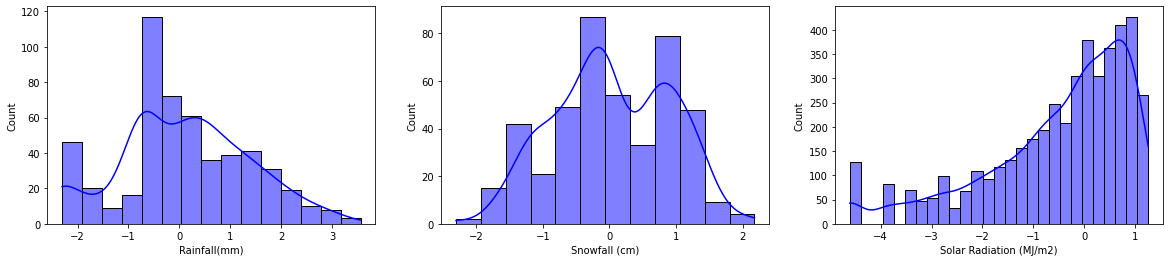

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,4))

sns.histplot(np.log(df['Rainfall(mm)']), kde=True, color='blue', ax=axs[0])
sns.histplot(np.log(df['Snowfall (cm)']),color='blue', kde=True, ax=axs[1])
sns.histplot(np.log(df['Solar Radiation (MJ/m2)']),color='blue', kde=True, ax=axs[2])

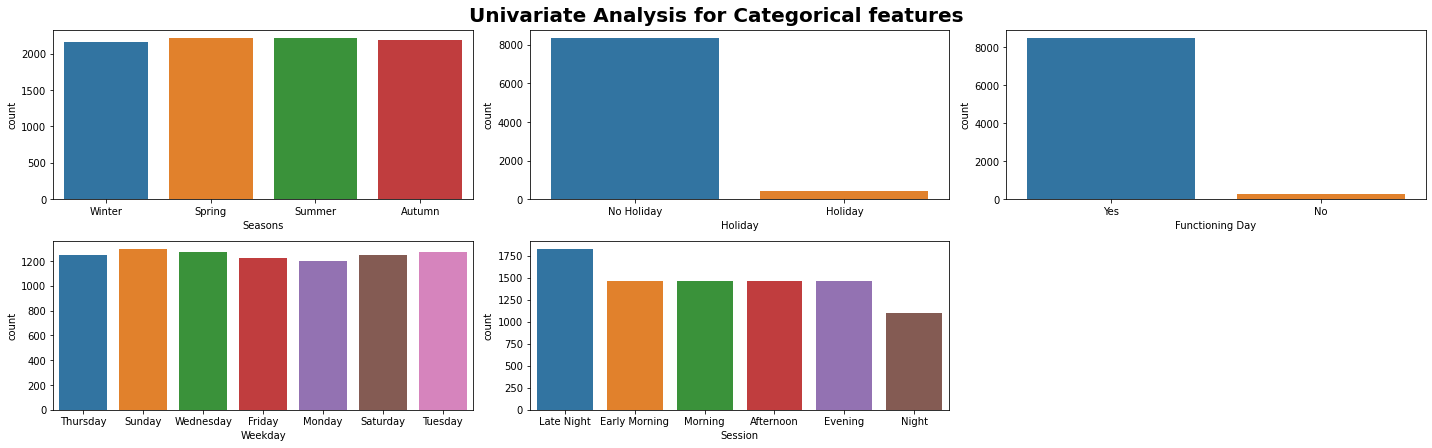

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('Univariate Analysis for Categorical features', fontsize=20, fontweight='bold', y=1.03)

for i in range(len(category_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[category_features[i]], data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

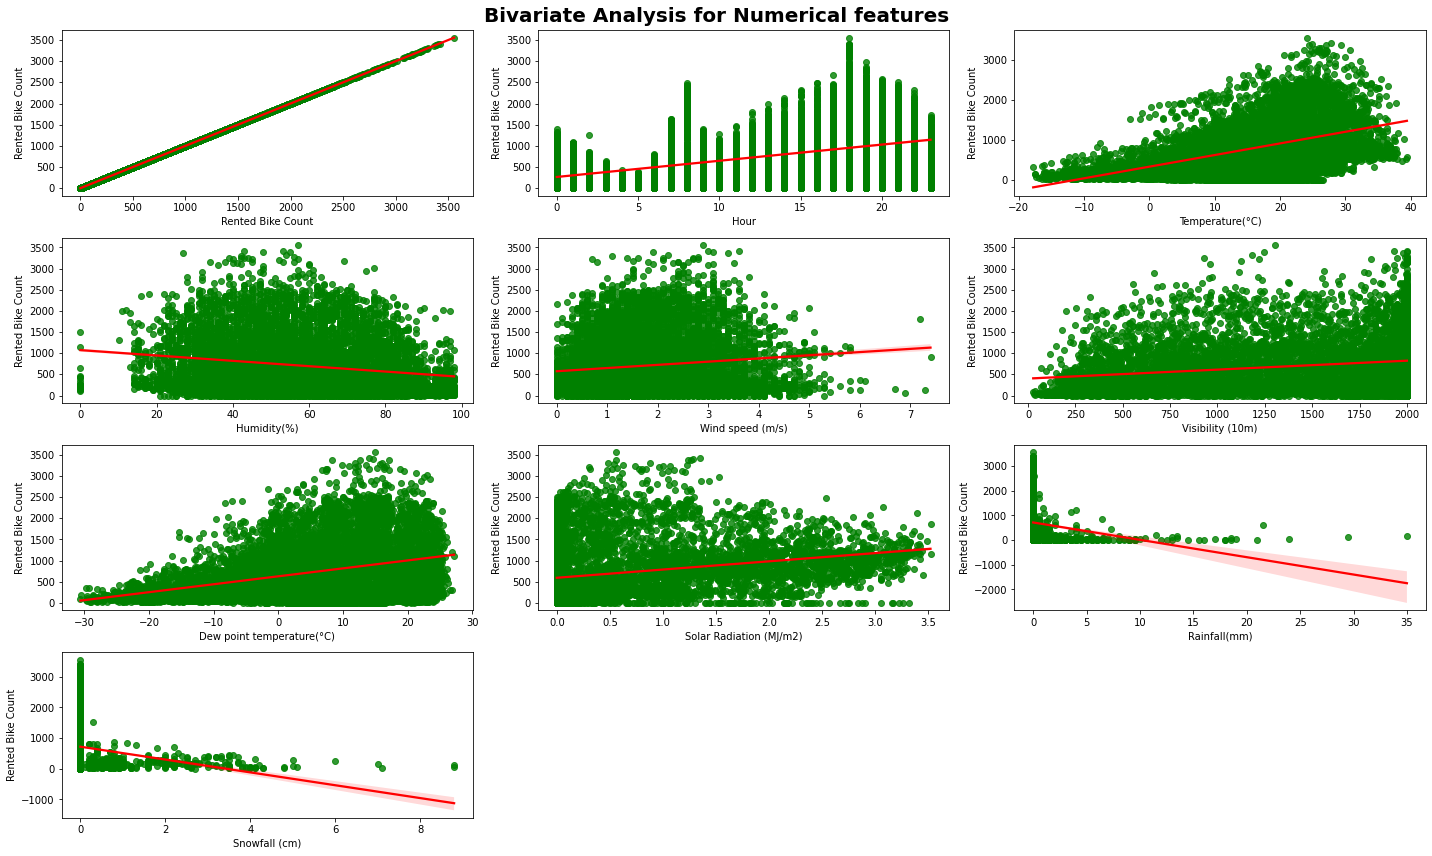

In [ ]:
plt.figure(figsize=(20,17))
plt.suptitle('Bivariate Analysis for Numerical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(len(numeric_features[:-3])):
    plt.subplot(6, 3, i+1)
    sns.regplot(x=df[numeric_features[i]], y=df['Rented Bike Count'], line_kws={'color':'red'}, scatter_kws={"color": 'green'})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

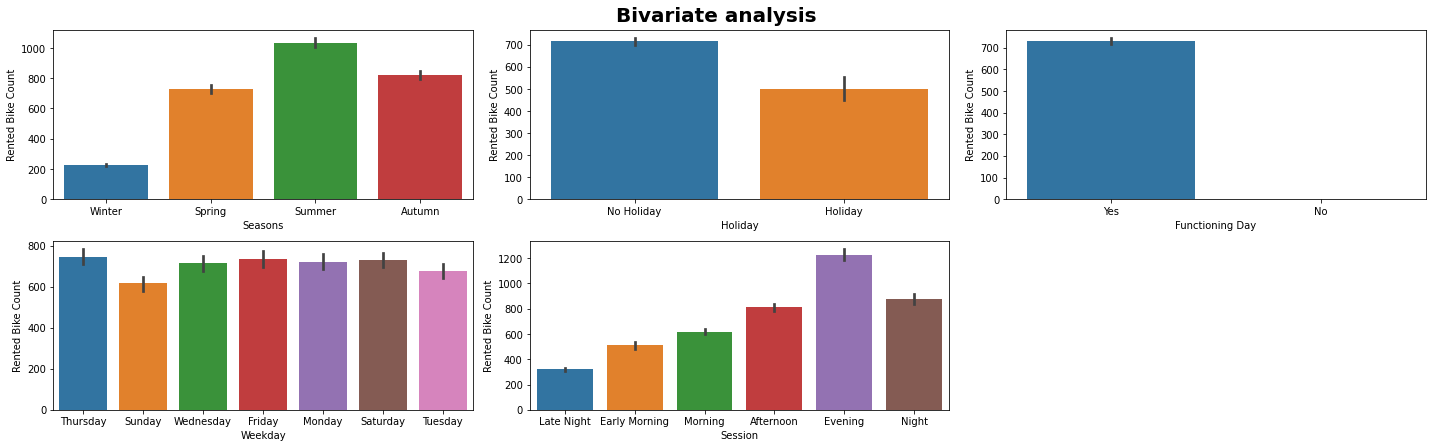

In [ ]:
plt.figure(figsize=(20,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.03)

for i in range(len(category_features)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[category_features[i]], y=df['Rented Bike Count'])
    plt.xlabel(category_features[i])
    plt.tight_layout()

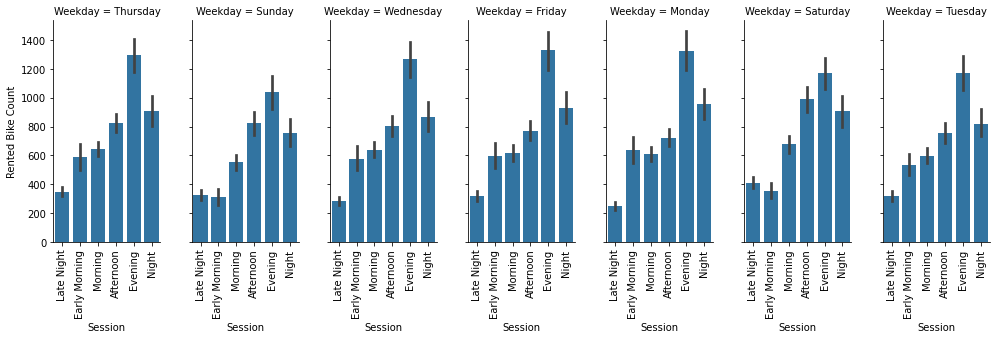

In [ ]:
g = sns.FacetGrid(df, col="Weekday", height=4, aspect=.5)
g.map(sns.barplot, "Session", "Rented Bike Count")
g.set_xticklabels(rotation=90)

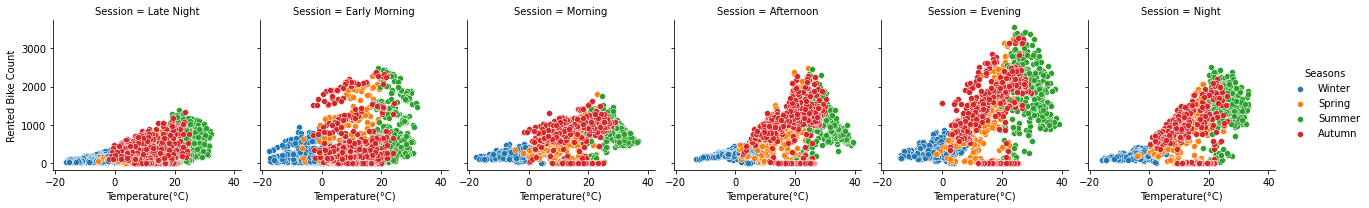

In [ ]:
g = sns.FacetGrid(df, col="Session", hue='Seasons')
g.map(sns.scatterplot, "Temperature(°C)", "Rented Bike Count")
g.add_legend()

<Figure size 1440x720 with 0 Axes>

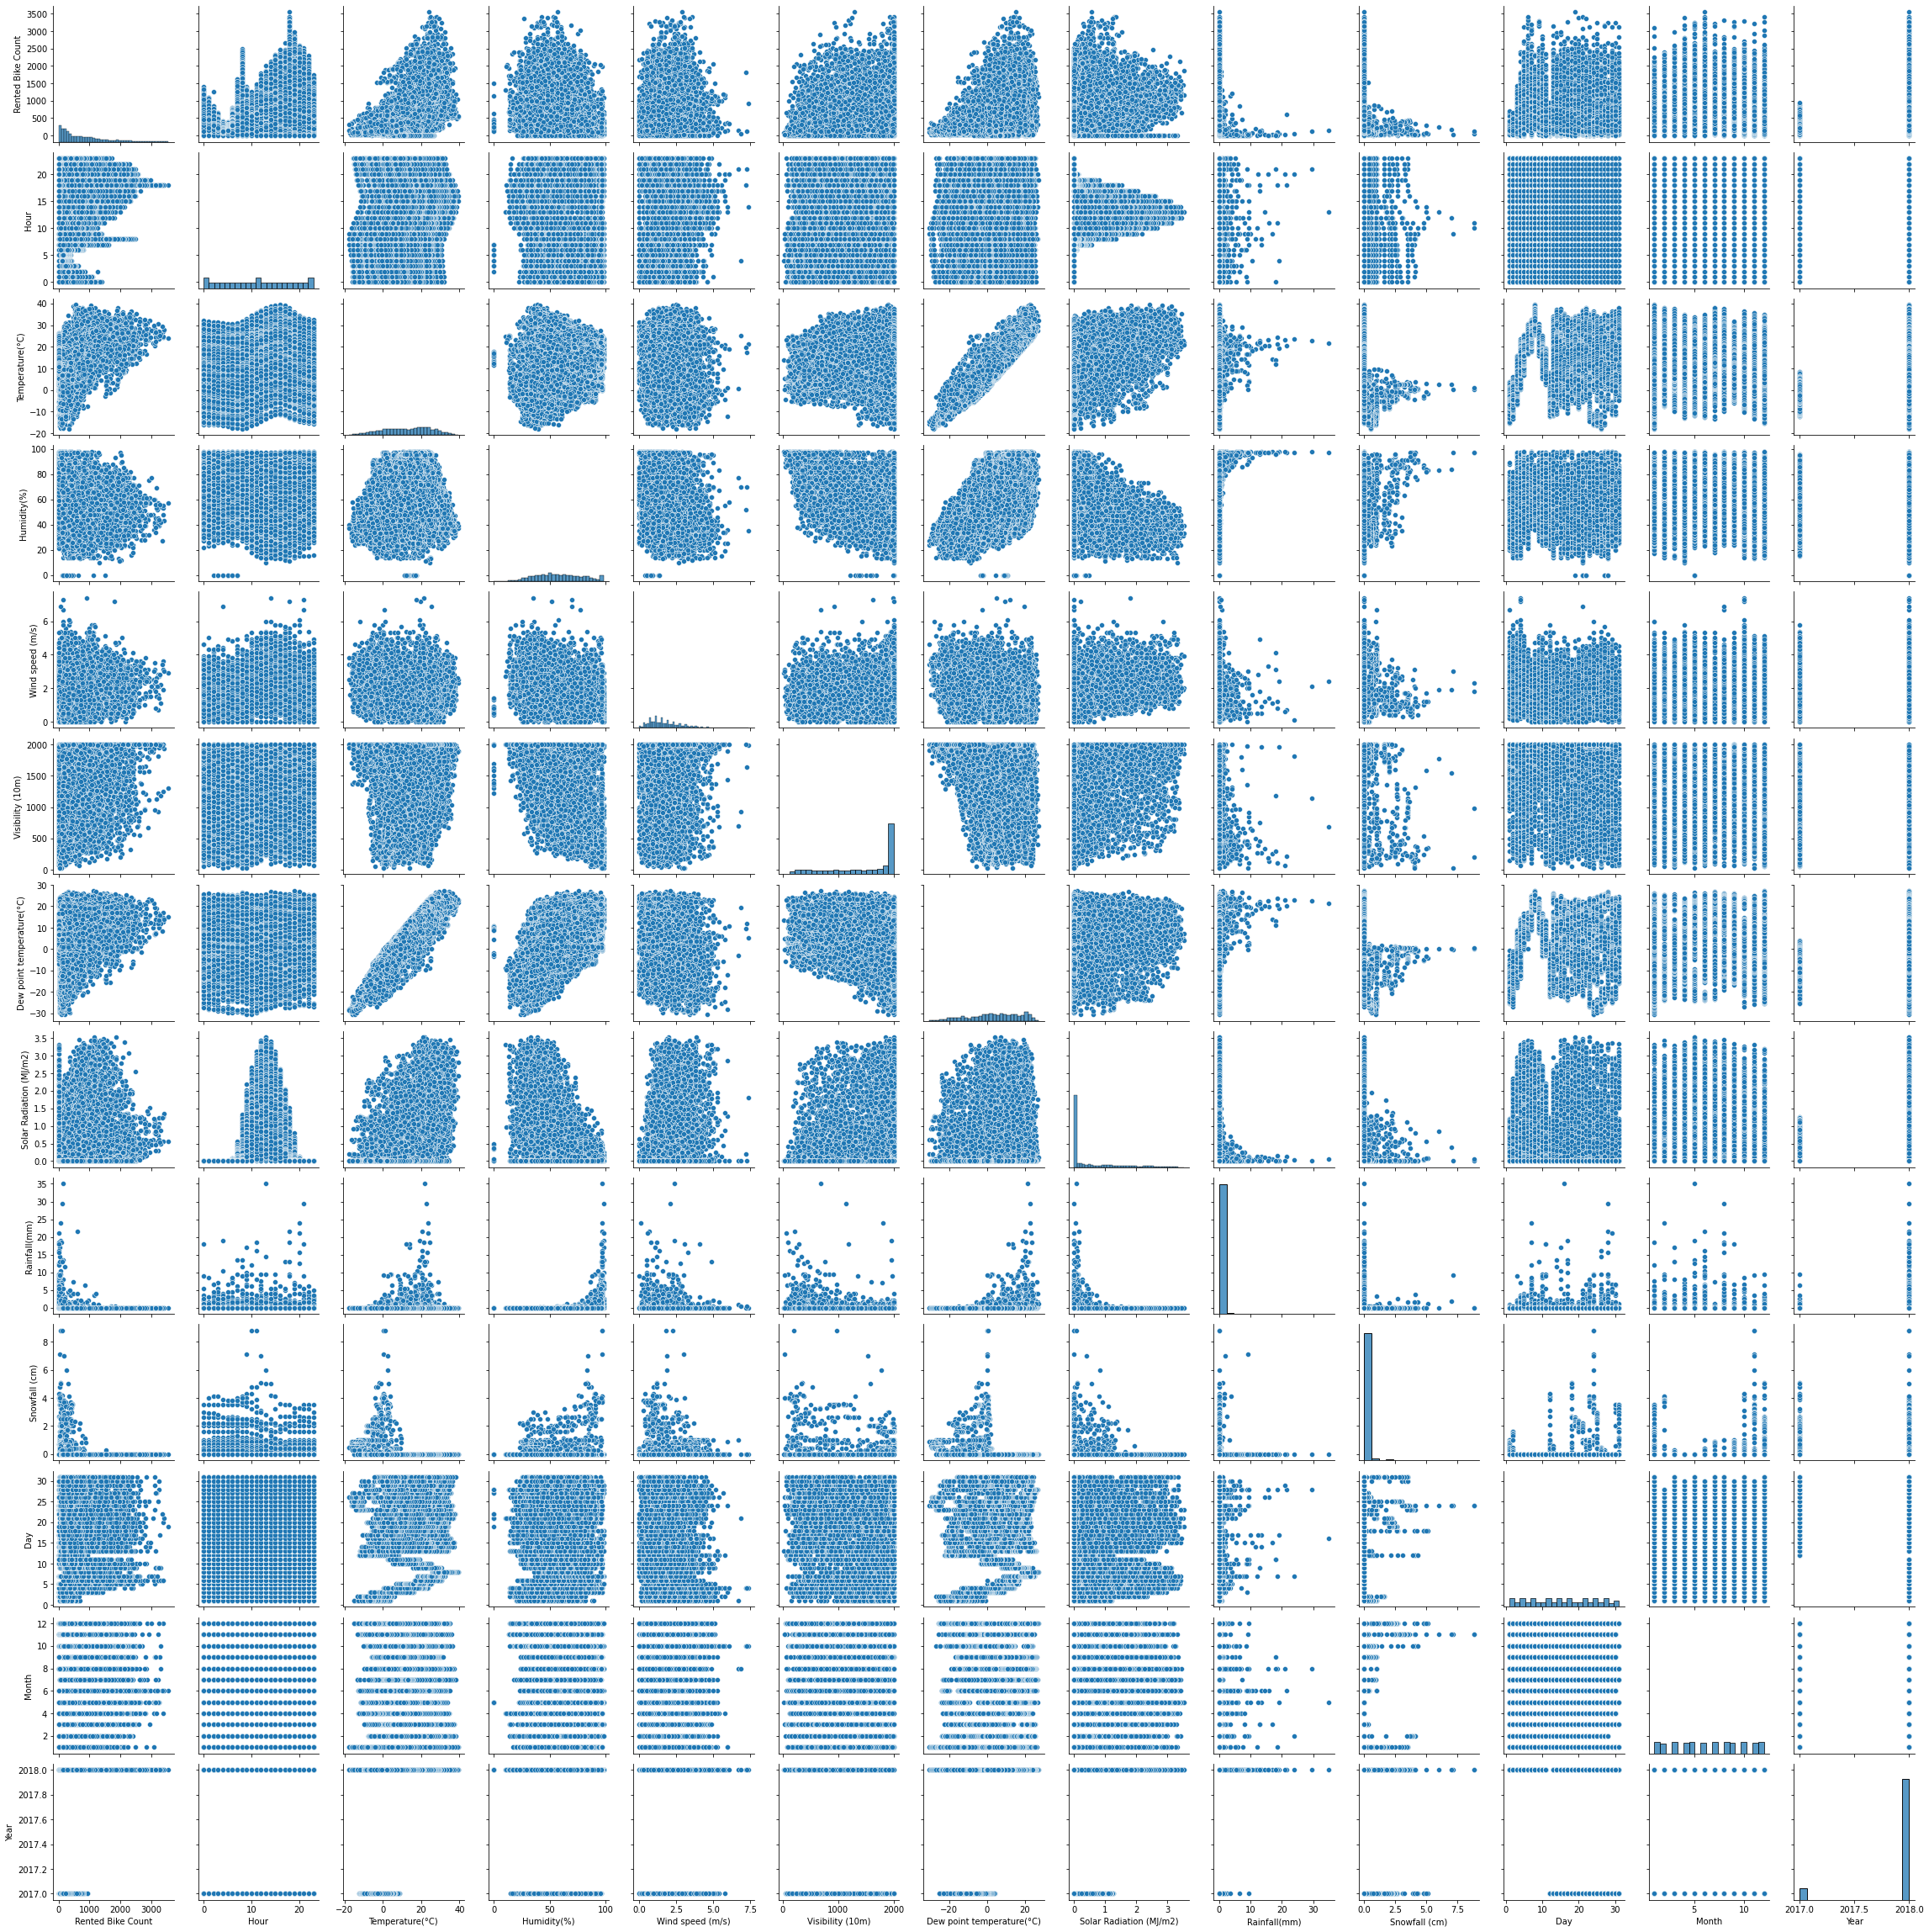

<Figure size 1440x720 with 0 Axes>

In [ ]:
sns.pairplot(df)
plt.figure(figsize=(20,10))

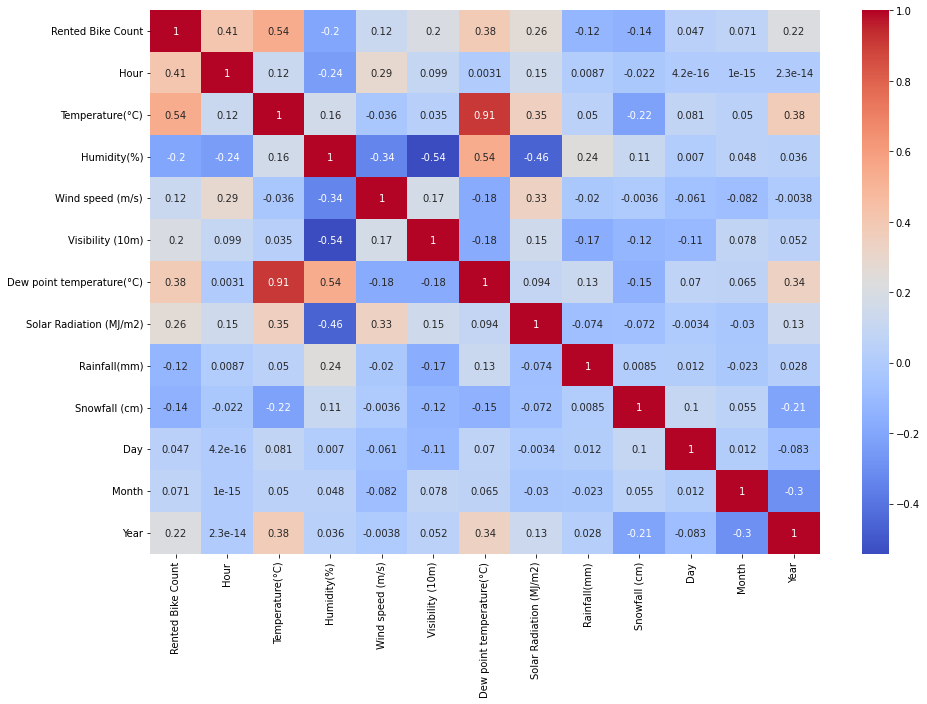

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Year', 'Dew point temperature(°C)']]])

VIF Factor                 features
0    3.998419                     Hour
1    3.236167          Temperature(°C)
2    6.757926              Humidity(%)
3    4.621365         Wind speed (m/s)
4    5.455330         Visibility (10m)
5    2.280208  Solar Radiation (MJ/m2)
6    1.081555             Rainfall(mm)
7    1.136671            Snowfall (cm)
8    3.849545                      Day
9    4.603431                    Month

In [ ]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Hour', 'Snowfall (cm)', 'Day', 'Month']

# **Encoding**

In [ ]:
df1 = df.copy()

In [ ]:
# Ordinal Encoding
df1['Functioning Day'] = df1['Functioning Day'].map({'Yes':1, 'No':0})

df1['Holiday'] = df1['Holiday'].map({'Holiday':1, 'No Holiday':0})

df1['Weekday'] = df['Weekday'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})


# One hot encoding
df1 = pd.get_dummies(df1, columns=['Seasons', 'Session'], drop_first=True)

In [ ]:
# display all the columns present in dataset
pd.options.display.max_columns = None

In [ ]:
df1.sample(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
7239                  0    15             20.3           52               1.3   
716                  66    20              1.9           90               0.9   
5954                309     2             28.6           80               1.2   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
7239              2000                       10.1                     1.15   
716                 88                        0.4                     0.00   
5954              1163                       24.8                     0.00   

      Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  Day  Month  Year  \
7239           0.0            0.0        0                0   28      9  2018   
716            0.0            0.0        0                1   30     12  2017   
5954           0.0            0.0        0                1    8      6  2018   

      Weekday  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
7239        5               0               0               0   
716         6               0               0               1   
5954        5               0               1               0   

      Session_Early Morning  Session_Evening  Session_Late Night  \
7239                      0                0                   0   
716                       0                1                   0   
5954                      0                0                   1   

      Session_Morning  Session_Night  
7239                0              0  
716                 0              0  
5954                0              0

In [ ]:
df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Weekday', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Session_Early Morning',
       'Session_Evening', 'Session_Late Night', 'Session_Morning',
       'Session_Night'],
      dtype='object')

In [ ]:
numerical_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Hour',
 'Snowfall (cm)',
 'Day',
 'Month']

In [ ]:
features = numerical_features.copy()
features.extend(['Holiday','Functioning Day','Weekday',
                'Seasons_Spring','Seasons_Summer','Seasons_Winter',
                'Session_Early Morning','Session_Evening','Session_Late Night','Session_Morning','Session_Night'])
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Hour',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Holiday',
 'Functioning Day',
 'Weekday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Session_Early Morning',
 'Session_Evening',
 'Session_Late Night',
 'Session_Morning',
 'Session_Night']

In [ ]:
len(features)

21

In [ ]:
X = df1[features]
y = df1['Rented Bike Count']

# **Train_Test_Split**

In [ ]:
# linear regression model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

print(X_train.shape)
print(X_test.shape)

(7008, 21)
(1752, 21)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **model selection**

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.5906545161353429

In [ ]:
reg.score(X_test, y_test)

0.5965941857250796

In [ ]:
d = {'Feature': X.columns, 'Slope': reg.coef_}
pd.DataFrame(data=d)

Feature       Slope
0           Temperature(°C)  298.368518
1               Humidity(%) -144.273982
2          Wind speed (m/s)   11.876412
3          Visibility (10m)    0.402903
4   Solar Radiation (MJ/m2)   43.473990
5              Rainfall(mm)  -63.507266
6                      Hour   48.673144
7             Snowfall (cm)   10.971742
8                       Day   -7.415751
9                     Month   11.624501
10                  Holiday  -27.447952
11          Functioning Day  177.466992
12                  Weekday  -16.865402
13           Seasons_Spring  -66.067839
14           Seasons_Summer  -77.611651
15           Seasons_Winter -147.421873
16    Session_Early Morning   73.823506
17          Session_Evening  207.561565
18       Session_Late Night    3.583881
19          Session_Morning    1.756777
20            Session_Night  110.893192

In [ ]:
# y_pred_test = reg.predict(X_test)
# y_pred_train=reg.predict(X_train)

# predict for test data
y_pred=reg.predict(X_test)

In [ ]:
d = {'y_actual':y_test, 'y_predict':y_pred, 'error':y_test-y_pred}
pd.DataFrame(data=d).head()

y_actual    y_predict       error
2883       264   306.687567  -42.687567
5268      1237  1114.658432  122.341568
5446      1607  1146.462263  460.537737
4806       746   735.422316   10.577684
6395       415   790.368248 -375.368248

In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)  # print("RMSE:",mean_squared_error(y_test,y_pred,squared=False))

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 169484.7835852069
RMSE : 411.6852967804496
R2 : 0.5965941857250796
Adjusted R2 :  0.5916973521413956


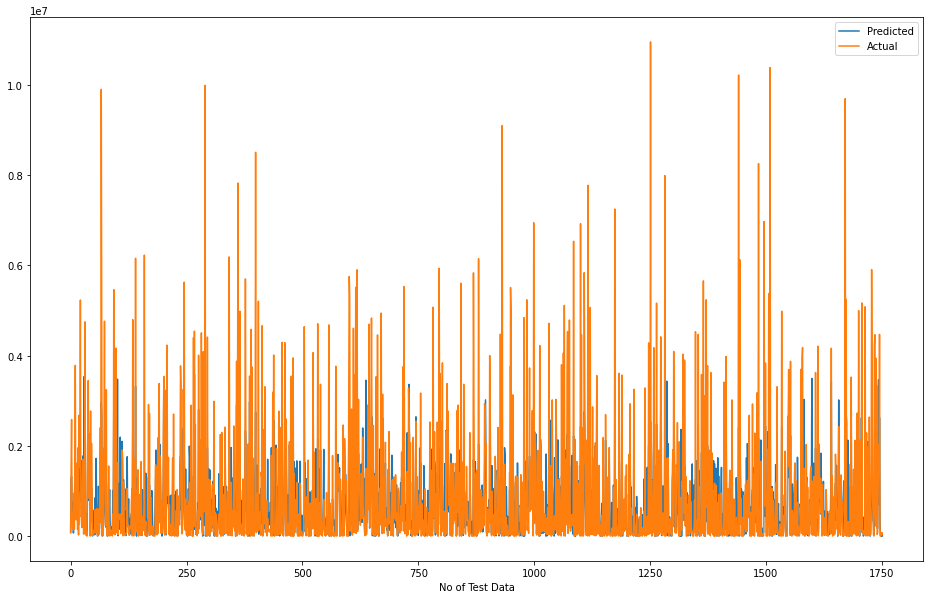

In [ ]:
plt.figure(figsize=(16,10))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))    #We are squaring it because we used square root transformation on y
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
# Lasso ridge


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

[18:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_absolute_error

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
# rmse_cross_val = rmse_cv(xgb)
# print("RMSE Cross-Validation:", rmse_cross_val)

# new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)

MAE: 174.8979320018871
MSE: 65725.4721417602
RMSE: 256.3697956892742
R2 Score: 0.8435609554611097
------------------------------


In [ ]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    plt.scatter(y_pred,y_test,color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    print(f'R^2 is {model.score(X_test,y_test)} \nAdj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)} \nRMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    pred_y_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
    print(pred_y_df[0:10])
    
    plt.figure(figsize=(20,5))
    plt.plot((y_pred)**2)
    plt.plot(np.array((y_test)**2))    #We are squaring it because we used square root transformation on y
    plt.legend(["Predicted","Actual"])
    plt.xlabel('No of Test Data')
    plt.show()

[18:17:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 is 0.858179982560033 
Adj R^2 is 0.8564584678974669 
RMSE is: 239.9734436041611
      Actual Value  Predicted Value  Difference
389             31       -22.623362   53.623362
8461           905       917.033020  -12.033020
3588          1375      1047.271973  327.728027
5086          1107      1161.880249  -54.880249
3366           414       327.704865   86.295135
7429           529       303.459900  225.540100
696            240       306.573090  -66.573090
2779          1031      1449.366211 -418.366211
2403           115        54.133678   60.866322
2674           446       508.260498  -62.260498


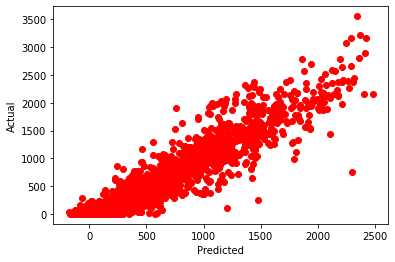

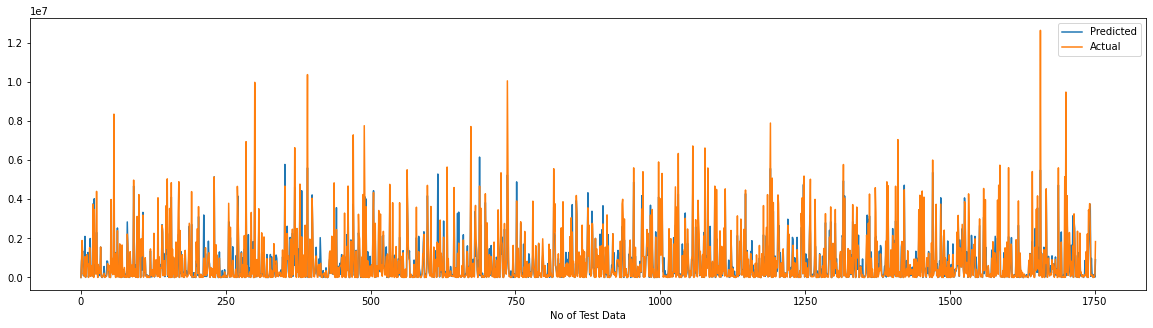

In [ ]:
predict_ss(XGBRegressor(),X,y)

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train)

[18:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# predict on train data.
y_pred_train_xgb = model.predict(X_train)

# predict on test data.
y_pred_test_xgb = model.predict(X_test)

In [ ]:
# calculating model score on train data.
print("Model Score:", model.score(X_train,y_train))

# calculating MSE
MSE_xgb= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :", MSE_xgb)

# calculating RMSE
RMSE_xgb=np.sqrt(MSE_xgb)
print("RMSE :", RMSE_xgb)


# calculating MAE
MAE_xgb= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :", MAE_xgb)

# calculating r2
r2_xgb= r2_score(y_train, y_pred_train_xgb)
print("R2 :", r2_xgb)

# calculating adjusted r2
Adjusted_R2_xgb=(1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0] - X_test.shape[1]-1)) )
print("Adjusted R2 :", Adjusted_R2_xgb )

Model Score: 0.8588354235187723
MSE : 58569.76960162478
RMSE : 242.0119203709288
MAE : 163.30578129572717
R2 : 0.8588354235187723
Adjusted R2 : 0.8571218650759366


R^2 is 0.8562158784839775 
Adj R^2 is 0.8544705220956328 
RMSE is: 241.62945848311278
      Actual Value  Predicted Value  Difference
389             31       -21.573387   52.573387
8461           905       902.343330    2.656670
3588          1375       997.003685  377.996315
5086          1107      1108.533973   -1.533973
3366           414       349.237730   64.762270
7429           529       301.292199  227.707801
696            240       277.688612  -37.688612
2779          1031      1407.973464 -376.973464
2403           115        71.119631   43.880369
2674           446       520.148377  -74.148377


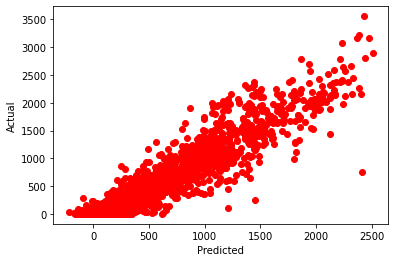

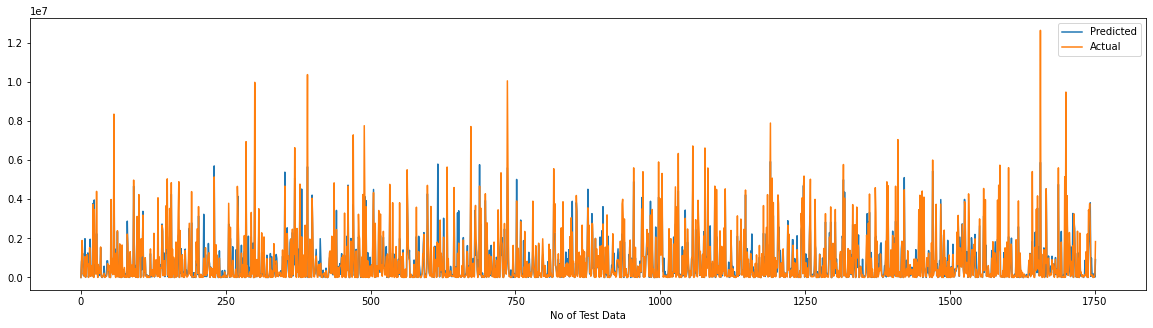

In [ ]:
predict_ss(GradientBoostingRegressor(),X,y)

R^2 is 0.9125928566135761 
Adj R^2 is 0.9115318450464577 
RMSE is: 188.39435255343957
      Actual Value  Predicted Value  Difference
389             31            44.31      -13.31
8461           905           968.50      -63.50
3588          1375          1264.95      110.05
5086          1107          1100.56        6.44
3366           414           377.27       36.73
7429           529           336.05      192.95
696            240           217.24       22.76
2779          1031          1364.04     -333.04
2403           115           149.04      -34.04
2674           446           522.64      -76.64


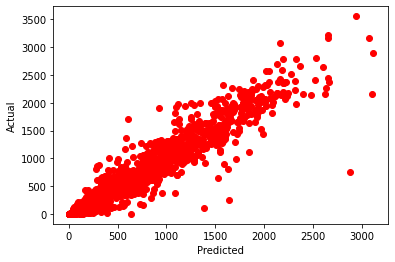

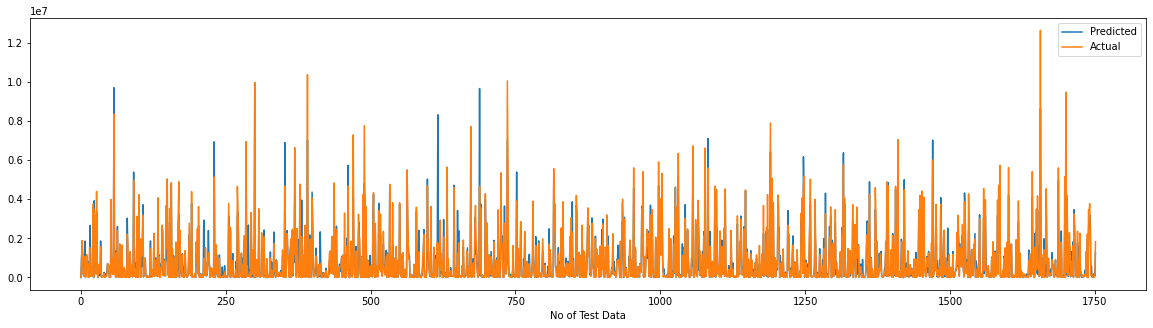

In [ ]:
predict_ss(RandomForestRegressor(),X,y)

R^2 is 0.6036030473386402 
Adj R^2 is 0.5987912924219416 
RMSE is: 401.1987488614667
      Actual Value  Predicted Value  Difference
389             31        87.505335  -56.505335
8461           905       871.701833   33.298167
3588          1375      1047.135323  327.864677
5086          1107       978.235227  128.764773
3366           414       609.038315 -195.038315
7429           529       653.444065 -124.444065
696            240      -238.592330  478.592330
2779          1031      1382.789294 -351.789294
2403           115       148.816509  -33.816509
2674           446       430.961593   15.038407


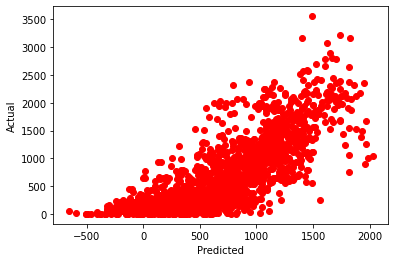

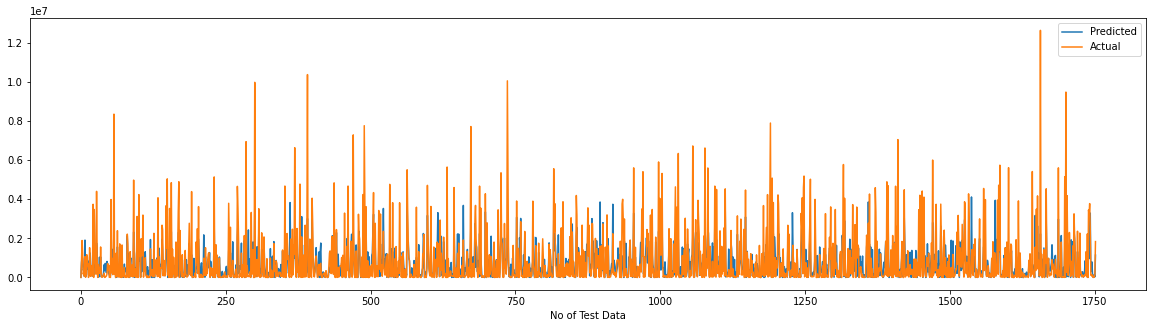

In [ ]:
predict_ss(LinearRegression(),X,y)

R^2 is 0.8240502168327376 
Adj R^2 is 0.8219144102162563 
RMSE is: 267.29373795807146
      Actual Value  Predicted Value  Difference
389             31             41.0       -10.0
8461           905            974.0       -69.0
3588          1375           1278.0        97.0
5086          1107           1005.0       102.0
3366           414            427.0       -13.0
7429           529           2017.0     -1488.0
696            240            234.0         6.0
2779          1031            972.0        59.0
2403           115            171.0       -56.0
2674           446            653.0      -207.0


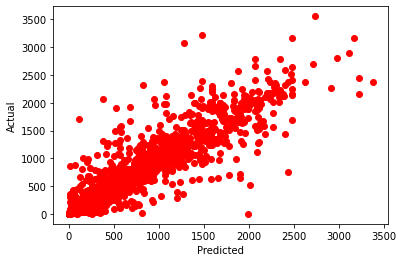

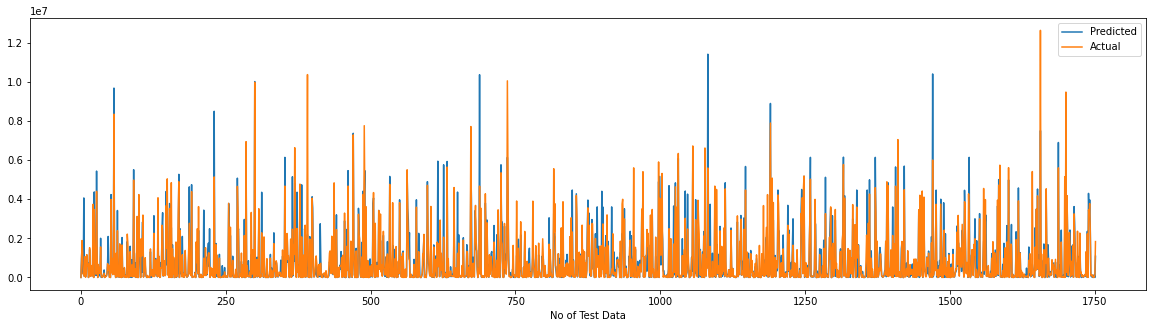

In [ ]:
predict_ss(DecisionTreeRegressor(),X,y)

R^2 is 0.2931208639802537 
Adj R^2 is 0.2845402501904186 
RMSE is: 535.7559440643824
      Actual Value  Predicted Value  Difference
389             31       287.228495 -256.228495
8461           905       732.690837  172.309163
3588          1375       690.590898  684.409102
5086          1107       664.952619  442.047381
3366           414       421.914607   -7.914607
7429           529       570.933495  -41.933495
696            240       267.569906  -27.569906
2779          1031       712.329464  318.670536
2403           115       326.154172 -211.154172
2674           446       629.848413 -183.848413


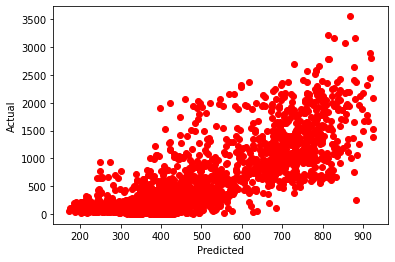

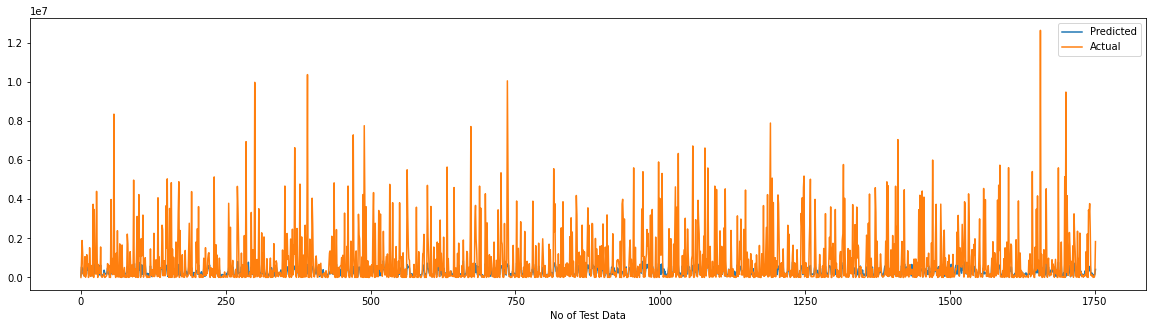

In [ ]:
from sklearn.svm import SVR
predict_ss(SVR(),X,y)

R^2 is 0.9265000986316708 
Adj R^2 is 0.9256079032971419 
RMSE is: 172.75785160434648
      Actual Value  Predicted Value  Difference
389             31        35.039832   -4.039832
8461           905       906.884616   -1.884616
3588          1375      1192.701783  182.298217
5086          1107      1216.689011 -109.689011
3366           414       327.374823   86.625177
7429           529       127.646830  401.353170
696            240       252.228517  -12.228517
2779          1031      1329.310375 -298.310375
2403           115        98.111779   16.888221
2674           446       453.291664   -7.291664


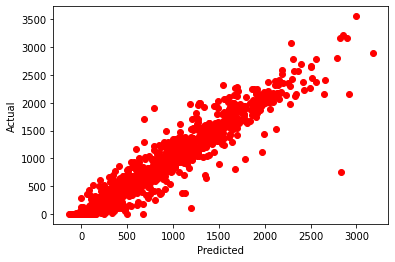

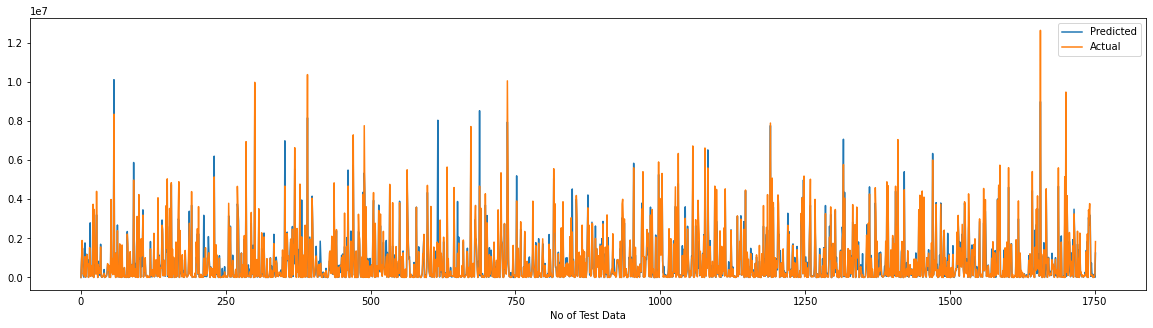

In [ ]:
predict_ss(LGBMRegressor(),X,y)

In [ ]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.270
Model:                            OLS   Adj. R-squared (uncentered):              0.268
Method:                 Least Squares   F-statistic:                              123.0
Date:                Sat, 19 Nov 2022   Prob (F-statistic):                        0.00
Time:                        18:18:00   Log-Likelihood:                         -56913.
No. Observations:                7008   AIC:                                  1.139e+05
Df Residuals:                    6987   BIC:                                  1.140e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           298.3685     22.681     13.155      0.000     253.907     342.830
x2          -144.2740     16.324     -8.838      0.000    -176.275    -112.273
x3            11.8764     11.490      1.034      0.301     -10.647      34.400
x4             0.4029     12.980      0.031      0.975     -25.042      25.848
x5            43.4740     18.921      2.298      0.022       6.383      80.565
x6           -63.5073     10.131     -6.268      0.000     -83.367     -43.647
x7            48.6731     58.513      0.832      0.406     -66.030     163.376
x8            10.9717     10.413      1.054      0.292      -9.441      31.384
x9            -7.4158     10.098     -0.734      0.463     -27.211      12.379
x10           11.6245     10.768      1.080      0.280      -9.484      32.733
x11          -27.4480      9.865     -2.782      0.005     -46.786      -8.110
x12          177.4670     10.173     17.445      0.000     157.525     197.409
x13          -16.8654      9.775     -1.725      0.084     -36.026       2.296
x14          -66.0678     13.813     -4.783      0.000     -93.146     -38.990
x15          -77.6117     15.929     -4.872      0.000    -108.838     -46.385
x16         -147.4219     18.936     -7.785      0.000    -184.542    -110.302
x17           73.8235     30.310      2.436      0.015      14.406     133.241
x18          207.5616     19.868     10.447      0.000     168.613     246.510
x19            3.5839     46.793      0.077      0.939     -88.144      95.312
x20            1.7568     18.038      0.097      0.922     -33.603      37.116
x21          110.8932     26.049      4.257      0.000      59.829     161.958
==============================================================================
Omnibus:                      728.324   Durbin-Watson:                   0.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1209.223
Skew:                           0.738   Prob(JB):                    2.63e-263
Kurtosis:                       4.402   Cond. No.                         14.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""